# Linear Regression

## Linear model $$y = f(x) = X\beta$$

Given : 

- $y$: dependent variable (a vector with the shape of $N x 1$ where $N$ is the number of samples)

- $X$: independent variables (a matrix of shape $N x D$ where $N$ is the number of samples and $D$ is the number of features)

- $\beta$: model's parameters (a vector of shape $D x 1$)

## Metric for the performance of the model

The performance of the model can be measured by Mean Square Error (MSE) metric, i.e:

$$L = \frac{1}{N}\sum_{i=1}^N (y_i - f(x_i))^2 = \frac{1}{N}||y - X\beta||_2^2 = \frac{1}{N}(y - X\beta)^T(y - X\beta)$$ 

The lower MSE (value of L) the better model

## Construct the optimization problem



$$\beta = argmin_{\beta} L = argmin_{\beta}\frac{1}{N}(y - X\beta)^T(y - X\beta)\:\:\:(*)$$ 

In this assignment, we will use Stochastics Gradient Descent (SGD), Minibatch Gradient Descent and Newton Methods to solve the convex optimization problem (\*)

Firstly, we can find out the gradient of $L$ w.r.t $\beta$ and the Hessian matrix of $L$ w.r.t. $\beta$ as below:

$$\nabla_{\beta} L = \nabla_{\beta} \frac{1}{N}(y - X\beta)^T(y - X\beta) = \frac{-2}{N}X^T(y-X\beta)$$

$$\nabla^2_{\beta}L = \frac{d}{d\beta}\frac{-2}{N}X^T(y-X\beta) = \frac{2}{N}X^TX$$


## Stochastic Gradient Descent method

**Idea**: *In each iteration, we use only 1 record from training datasets to calculate the value of gradient of $L$ w.r.t. $\beta$, then update the value of $\beta$ by using this value. The algorithm will stop at the given number of steps.* 

$$\beta^{k+1} = \beta^k - t \nabla L^{k}_{\beta}$$

## Minibatch Gradient Descent method

**Idea**: *Similar to SGD, but in each iteration, we use b (batch size) records from training datasets to calculate the value of gradient of $L$ w.r.t. $\beta$ instead of 1 record* 

$$\beta^{k+1} = \beta^k - t \nabla L^{k}_{\beta}$$

## Newton method

**Idea**: *By using second-order approximation given by Taylor expansion of L and finding the value of beta that minimize the approximation function of L, we get the following formula:*

$$\beta^{(k)} =\beta^{(k-1)} - \bigg(\nabla^2L(\beta^{(k-1)})\bigg)^{-1}\nabla L(\beta^{(k-1)})$$



## Implementation for SGD and Minibatch GD

In [12]:
## X: N x D matrix
## y: N x 1 matrix
## beta: D x 1 matrix
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

def compute_loss(X, y, beta):
    y_pred = X.dot(beta)
    loss = ((y_pred - y)**2).mean()
    return loss

def compute_gradient(X, y, beta):
    N = X.shape[0]
    grad = 2/N * X.T.dot(X.dot(beta) - y)
    return grad

def compute_loss_v2(y_pred, y):
    loss = ((y_pred - y)**2).mean()
    return loss

def norm_l2(x):
    return np.sqrt((x**2).sum())

In [174]:
def gen_batch(X,y, bs=1):
    num_samples = X.shape[0]
    num_batches = num_samples//bs
    rd_id = np.random.permutation(num_samples)
    X,y = X[rd_id],y[rd_id]
    for i in range(num_batches):
        start_idx = bs * i
        end_idx = bs *(i+1) if bs *(i+1) <= num_samples else num_samples 
        if start_idx == num_samples:
            break
        yield (X[start_idx:end_idx], y[start_idx:end_idx])
    
    
def mini_batch_gd(X, y, lr, beta = None, last_beta = None,bs = 1, accelerated= False, step = 0):
    if beta is None:
        beta = np.zeros((X_normalized.shape[1],1))
        last_beta = beta
    g = gen_batch(X, y, bs)
    losses = []
    for X_batch, y_batch in g:
        step += 1
        grad = compute_gradient(X_batch, y_batch, beta)
        loss = compute_loss(X, y, beta)
        losses.append(loss)
        if not accelerated:
            beta = beta - lr * grad
        else:
            v = beta + (step-1)/(step+2) *(beta - last_beta)
            last_beta = beta
            grad = compute_gradient(X_batch, y_batch, v)
            beta = v - lr * grad
        
        

    return losses, beta, last_beta, step
        

def minibatch_training(batch_size, num_iters, lr, accelerated =False):
    ## Minibatch with simple gradient descent
    beta = np.zeros((X_normalized.shape[1],1))
    last_beta = np.zeros((X_normalized.shape[1],1))
    step=0
    losses = []
    num_epoches = num_iters//(num_samples//batch_size)
    for e in range(num_epoches):
        loss, beta, last_beta, step = mini_batch_gd(X_normalized, y, lr, beta, last_beta, bs = batch_size, accelerated=accelerated, step=step)
        losses += loss
    return losses, beta

In [175]:
## Reading data to python
import pandas as pd

import numpy as np
train_data = pd.read_csv("./boston-housing/train.csv")
## Get first 13 columns as X
X = train_data.values[:,1:-1]

## Normalize X
mean = X.mean(axis = 0)
std = X.std(axis = 0)
X_normalized = (X - mean)/std
X_normalized = np.c_[np.ones(X.shape[0]), X_normalized]
## Get last columns as y
y = train_data.values[:,-1].reshape((X.shape[0],1))

In [193]:
sgd_losses, sgd_beta = minibatch_training(1, 1000, 0.01, False)

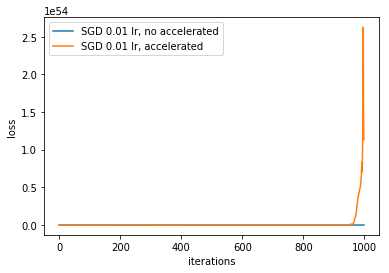

In [178]:
plt.plot(sgd_losses, label = 'SGD 0.01 lr, no accelerated')
acc_sgd_losses, acc_sgd_beta = minibatch_training(1, 1000, 0.01, True)
plt.plot(acc_sgd_losses, label = 'SGD 0.01 lr, accelerated')
plt.legend()
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

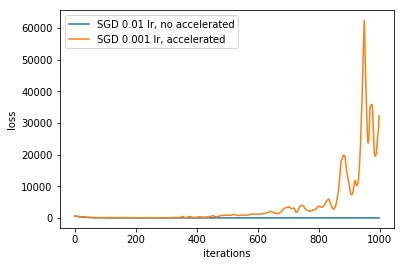

In [184]:
plt.plot(sgd_losses, label = 'SGD 0.01 lr, no accelerated')
acc_sgd_losses, acc_sgd_beta = minibatch_training(1, 1000, 0.001, True)
plt.plot(acc_sgd_losses, label = 'SGD 0.001 lr, accelerated')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()

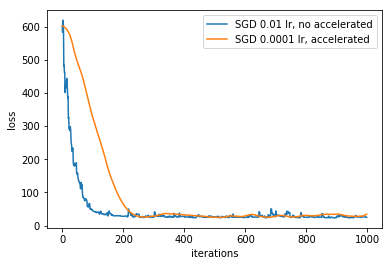

In [185]:
plt.plot(sgd_losses, label = 'SGD 0.01 lr, no accelerated')
acc_sgd_losses, acc_sgd_beta = minibatch_training(1, 1000, 0.0001, True)
plt.plot(acc_sgd_losses, label = 'SGD 0.0001 lr, accelerated')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()

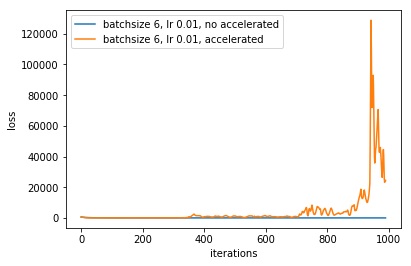

In [186]:
minibatch_losses, minibatch_beta = minibatch_training(6, 1000, 0.01, False)
plt.plot(minibatch_losses, label = 'batchsize 6, lr 0.01, no accelerated')
minibatch_losses, minibatch_beta = minibatch_training(6, 1000, 0.01, True)
plt.plot(minibatch_losses, label = 'batchsize 6, lr 0.01, accelerated')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()


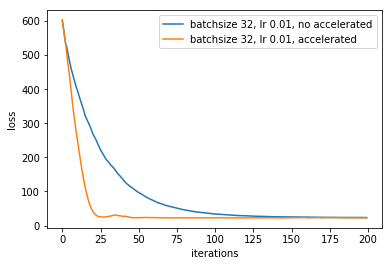

In [187]:
minibatch_losses, minibatch_beta = minibatch_training(32, 200, 0.01, False)
plt.plot(minibatch_losses, label = 'batchsize 32, lr 0.01, no accelerated')
minibatch_losses, minibatch_beta = minibatch_training(32, 200, 0.01, True)
plt.plot(minibatch_losses, label = 'batchsize 32, lr 0.01, accelerated')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()


In [191]:
sgd_losses

[]

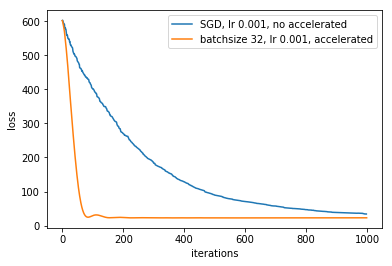

In [223]:
sgd_losses, sgd_beta = minibatch_training(1, 1000, 0.001, False)
plt.plot(sgd_losses, label = 'SGD, lr 0.001, no accelerated')
minibatch_losses, minibatch_beta = minibatch_training(32, 1000, 0.001, True)
plt.plot(minibatch_losses, label = 'batchsize 32, lr 0.001, accelerated')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()


## Implementation for Newton method

In [197]:
## Hessian matrix:
N = X_normalized.shape[0]
hess_matrix = 2/N * X_normalized.T.dot(X_normalized)
hess_inversed = np.linalg.pinv(hess_matrix)

In [198]:
newton_beta =  np.zeros((X_normalized.shape[1],1))
losses = []
grad = compute_gradient(X_normalized, y, newton_beta)
grad_norm = np.sqrt(grad.T.dot(grad))
num_iters = 0
while grad_norm > 1e-6 and num_iters < 1e3:
    loss = compute_loss(X_normalized, y, newton_beta)
    grad = compute_gradient(X_normalized, y, newton_beta)
    grad_norm = np.sqrt(grad.T.dot(grad))
    newton_beta = newton_beta - hess_inversed.dot(grad)
    
    losses.append(loss)
    num_iters += 1

In [199]:
losses

[602.3166366366366, 22.389549423647892]

In [200]:
newton_beta

array([[22.76876877],
       [-0.38533599],
       [ 1.07418454],
       [ 0.37631929],
       [ 0.89927653],
       [-1.80662577],
       [ 2.64908845],
       [-0.12996621],
       [-3.06379849],
       [ 2.87156628],
       [-2.19483476],
       [-1.84128775],
       [ 1.00856953],
       [-4.23652255]])

## Compare result with sklearn library

In [204]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
start_time = datetime.now()
reg.fit(X_normalized, y)
print('running_time:', datetime.now() - start_time)


running_time: 0:00:00.010165


In [203]:
beta = reg.coef_[0]
beta[0] = reg.intercept_
beta

array([22.76876877, -0.38533599,  1.07418454,  0.37631929,  0.89927653,
       -1.80662577,  2.64908845, -0.12996621, -3.06379849,  2.87156628,
       -2.19483476, -1.84128775,  1.00856953, -4.23652255])

In [227]:
 
print("Difference between Newton method's result and sklearn library: ",norm_l2(beta-newton_beta.T[0]))

Difference between Newton method's result and sklearn library:  6.295378177329821e-15


In [225]:
 
print("Difference between Minibatch GD method's result and sklearn library: ",norm_l2(beta-minibatch_beta.T[0]))

Difference between Minibatch GD method's result and sklearn library:  0.4248816868514875
